# Problem 6 Joint Notebook

## Imports go here

Imports for Problem 2, free-free emission

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from two_photon import two_ph

## Generate functions here 

Code for Problem 2, free-free emission  
Make sure gauntff_noerr.dat is in a place where this notebook can grab it!!!

In [2]:
### Interpolation of free-free gaunt factor ###

# read in the data table for free free gaunt factor
# this is basically our 'z' data
g_table = 'gauntff_noerr.dat'
g_data = np.loadtxt(g_table, skiprows=42) # skipping the header

# follow the header to get log(u) and log(gam2) values for
# interpolation   
g_logu = np.arange(-16, 13.2, 0.2)
g_loggam2 = np.arange(-6, 10.2, 0.2)

# create the interpolation
g_interp = interpolate.interp2d(g_loggam2, g_logu, g_data)

### Evaluation of formula ###

# fundamental constants
Ry = 2.17987e-11 # erg
h = 6.62606885e-27 # erg * s
k = 1.3807e-16 # erg * k^-1
c = 2.998e10 # cm / s

# get gam2 and u in terms of T and nu
gam2 = lambda T: Ry/(k * T)
u = lambda T, nu: (h * nu) / (k * T)

# main function to be evaluated 

def gamff (T, lamb):
    # convert a wavelength (lamb) in micrometers to a frequency
    nu = (c / (lamb * 10**-4))
    
    # interpolate the gaunt factor
    gff = g_interp(np.log10(gam2(T)),np.log10(u(T, nu)))
    
    # transpose the matrix. This is just for consistensy sake with the 
    # horizontal inputs 
    gff = np.resize(gff, (1000,))
    
    # evaluate the function 
    output = 5.44 * 10**(-39) * (4*np.pi) * (T**(-1/2)) * gff * np.exp(-h * nu/(k * T)) * nu
    return output

## Free Bound

In [3]:
# General function for the gaunt factor
import math 
import numpy as np 
import matplotlib.pyplot as plt 

def total_sigma_bf(v,Z,l,n):
    E = v*h
    if E < (Z**2 * R / n**2):
        return 0.
    sigma_sum = sigma_bf_below(n, l, v, Z) + sigma_bf_above(n, l, v, Z)

    return sigma_sum

def get_gaunt_factor_bf(v, Z, n, E):
    sigma_bf = a_n(v,Z,n)
    sigma_k = get_kramer_sigma(n, E, Z)
    
    return sigma_bf/sigma_k

# Kramer's cross section (39)
def get_kramer_sigma(n, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    kramer_sigma = 2.**4./(3*math.sqrt(3.))*e_charge**2./(e_mass*c*v) *1./n *(rho**2/(1+rho**2))**2. 
    return kramer_sigma

# Quantum cross section going to l-1 (36)
def sigma_bf_below(n, l, v, Z): 
    
    E = v*h
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    p1 = math.pi*e_charge**2/(e_mass*c*v)
    p2 = 2.**(4*l)/3.
    
    p3 = l**2 * math.factorial(n+l)
    
    l = int(l)
    
    # make sure we're counting for the extreme cases, when l = 0 or 1
    if l == 0: 
        return 0
    elif l ==1: 
        p3 = 1
    else:
        for i in range(1, l): 
            p3 *= (i**2 + eta**2)
    
    # the factorial of a negative number does not exist
    if n-l-1<0: 
        return 0
    else:
        p4 = math.factorial(2*l+1) *math.factorial(2*l-1) * math.factorial(n-l-1)
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta))

    p6 = rho**(2*l+2)/(1+rho**2)**(2*n-2)
    
    p7 = (G_l(l,-(l+1-n),eta,rho)-(1+rho**2)**(-2)*G_l(l,-(l-1-n),eta,rho))**2 
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Quantum cross section going to l+1 (37)
def sigma_bf_above(n, l, v, Z): 
    E = v*h
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n
    
    p1 = math.pi*e_charge**2/(e_mass*c*v)
    
    p2 = 2.**(4*l+6)/3.
    

    p3= (l+1)**2 * math.factorial(n+l)

    l = int(l)
    n = int(n)
    
    for i in range(1,l+2): 
        
        p3 *= (i**2+eta**2)
    
    if n-l-1<0: 
        return 0
    else:
        p4 = (2*l+1)*math.factorial(2*l+1)*math.factorial(2*l+2)*math.factorial(n-l-1)*((l+1)**2+eta**2)**2
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta))
    
    p6 = rho**(2*l+4)*eta**2/(1+rho**2)**(2*n)
    
    p7 = ((l+1-n)*G_l(l+1,-(l+1-n),eta,rho)+(l+1+n)/(1+rho**2)*G_l(l+1,-(l-n),eta,rho))**2 
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Bound free matrix element Gl (appendix C)
def G_l(l, m, eta, rho): 
    
    m = int(m)
    gl = 0
    for s in range(0,2*m+1): 
        gl += b_const(s, l, m, eta, rho)*rho**s
    return gl 

# constant for the Gl free matrix element (Appendix c, eqn c8)
def b_const(s, l, m, eta, rho):
    
    if s==0:
        return 1
    elif s==1: 
        return 2*m*eta/l
    else:
        p1 = (4*eta*(s-1-m))*b_const(s-1, l, m, eta, rho)
        p2 = (2*m+2-s)*(2*m+2*l+1-s)*b_const(s-2, l, m,  eta, rho)
        return -1./(s*(s+2*l-1))*(p1+p2)
    
import numpy as np 

def a_n(v,Z,n): #Matthew and Brown 1970
    E = h*v
    sigma_weighted = 0
    if E < (Z**2 * R / n**2):
        return 0.
    else:
        for l_index in range(int(n)):
            sigma_weighted += ((2*l_index) + 1)* total_sigma_bf(v,Z,l_index,n) 
    return sigma_weighted / (n**2)

def gamma_fb(v,Z, n, T): #equation 4.23 of Osterbrock
    #v is the frequency
    an = a_n(v, Z, n)
    part1 = (2/np.pi)**(0.5)*np.exp(((Z**2)*R)/n**2)/((c**2)*((e_mass*k*T)**(3/2)))
    part2 = 2*(n**2)*h*((h*v)**3)*an*np.exp((-h*v)/(k*T))
    return part1*part2
    
def emissivity(Np, Ne, gamma): #equation 4.22 of Osterbrock
    #Np= number density of protons
    Ne=10e-4 #number density of electrons, from table 4.6 of Osterbrock
    Jv= Nt*Ne*gamma/ (4.*np.pi)
    return Jv

def Lyman_C(gamma): #equation from Ono et al. 2010 fig 4 
    alpha_b= 1.37e-14 #case B recombination coefficient for hydrogen cm3 s-1 -- table 4.6 in Osterbrock
    fesc=0.1 # escape fraction of radiation
    Nlyc=1.47234061733e+53 #Number of LyC photons/ s --comes from our pop synthesis model
    Lv=gamma * (1-fesc) * Nlyc / alpha_b
    return Lv
    
def summed_emission_coefficient(v, Z, n, T):
    gamma_total = 0
    for n_index in range(int(n)):
        if n_index == 0:
            gamma_total+=0
        else:
            gamma_total+= gamma_fb(v,Z,n_index,T)
    return gamma_total


## Call the functions here

A common list of inputs

In [4]:
# a list of wavelength in micrometers
wavelength = np.logspace(-1, 1, 1000)

# a corresponding list of frequency in Hz
frequency = (c / (wavelength * 10**-4))

In [5]:
# Bound free 

#reproducing the final plot

# Constants in CGS units: http://www.astro.wisc.edu/~dolan/constants.html, thanks Enia <3
R = 2.1798741e-11 # Rydber's constant [erg]
c = 2.99792458e10 # speed of light [cm s-1.]
e_charge = 4.8032068e-10 # electron charge [esu]
e_mass = 9.1093897e-28 # electron mass [g]
h = 6.6260755e-27 # planck's constant [erg s]
k = 1.380658e-16 #Boltzmann constant [erg K-1]
n = 10. 
l = 0
Z = 1.
T= 10000. #K

y_bf=[]
for i in range(len(frequency)):
    y_bf.append(frequency[i]*summed_emission_coefficient(frequency[i], Z, n, T))

#plt.plot(wavelength, y_bf)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10e-28,10e-26)
#plt.xlabel('Wavelength (microns)')
#plt.ylabel(r'$\nu\gamma_{\nu} (erg  cm^3  s^{-1})$')
#plt.show()

Inputs specific to free-free emission

In [6]:
# Temperature
T = 10000

Calling free-free emission code

In [7]:
freefree = gamff(T, wavelength)

## Combine outputs here

In [8]:
lam_2ph, y_2ph, ynu_2ph = two_ph(T, 1e0) #1 particle/cc
ff_bf_comb=[np.pi*4*a+b for a,b in zip(y_bf, freefree)]

/Users/cesar/Documents/cursos/202/projecv_2/ASTR202_final_project/two_photon.py:84: RuntimeWarning: invalid value encountered in power
  A = C*(y*(1-(4*y)**gamma)+delta*y**beta*(4*y)**gamma)


## Plot here 

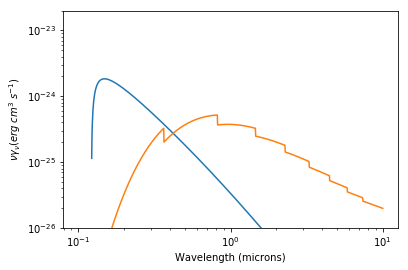

In [9]:
#plt.loglog(wavelength, freefree)

# plt.figure(figsize=(7,5))
# label axis 
plt.loglog(lam_2ph,ynu_2ph, basex=10, basey=10)
plt.plot(wavelength, ff_bf_comb)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-26, 2e-23)
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'$\nu\gamma_{\nu} (erg \; cm^3 \; s^{-1})$')

plt.show()

## Lyman Continuum from parts 2 and 3

In [10]:
LyC=[]
for i in range(len(frequency)):
    gamma_total=(ff_bf_comb[i]+y_2ph[i])/frequency[i]
    LyC.append(Lyman_C(gamma_total))
# print(LyC) #units erg-- this is a luminosity density

In [11]:
print (len(LyC*frequency))
Lumin = LyC*frequency #ergs/s
np.savetxt('LyC.txt',LyC)

1000


In [12]:
#print (LyC*frequency) #10^40

In [13]:
print(Lyman_C(5))

4.836155312397811e+67


In [14]:
25924*10**6*3.08*10**18
#el 25924: z = 3 to Mpc, then 10**6 to pc, then pc to cm
#http://www.astro.ucla.edu/~wright/CosmoCalc.html
# 10**-29 micro Jansky

7.984592e+28

In [15]:
sed2 = (Lumin/(4*np.pi*(25924*10**6*3.08*10**18)**2))/(10**(-29)) #microjanskys

In [16]:
# print (sed2)
# type(LyC)

In [17]:
sed3 = (np.array(LyC)/(4*np.pi*(25924*10**6*3.08*10**18)**2))/(10**(-29)) #microjanskys
print (len(sed3))
print (sed3)
# np.argwhere(np.isnan(sed3))

1000
[  2.69825122e-07   2.87838125e-07   3.06958623e-07   3.27248414e-07
   3.48772356e-07   3.71598502e-07   3.95798226e-07   4.21446370e-07
   4.48621380e-07   4.77405460e-07   5.07884720e-07   5.40149335e-07
   5.74293711e-07   6.10416644e-07   6.48621502e-07   6.89016396e-07
   7.31714367e-07   7.76833572e-07   8.24497480e-07   8.74835069e-07
   9.27981033e-07   9.84076038e-07   1.04326965e-06   1.10571251e-06
   1.17156436e-06   1.24099179e-06   1.31416845e-06   1.39127532e-06
   1.47250093e-06   1.55804166e-06   1.64810196e-06   1.74289468e-06
   1.84264128e-06   1.94757218e-06   2.05792700e-06   2.17395489e-06
   2.29591481e-06   2.42407587e-06   2.55871761e-06   2.70013035e-06
   2.84861554e-06   3.00448604e-06   3.16806649e-06   3.33969370e-06
   3.51971694e-06   3.70849835e-06   3.90641329e-06   4.11385073e-06
   4.33121359e-06   4.55891921e-06   4.79739966e-06   5.04710220e-06
   5.30848965e-06   5.58204083e-06   5.86825096e-06   6.16763211e-06
   6.48071360e-06   6.8080424

In [18]:
# print (sed3)
sed3_cut = sed3[:695]
# print (sed3_cut)
wavelength_cut = wavelength[:695]
wavelength_angs = wavelength_cut*10**4
print (len(wavelength_angs))

695


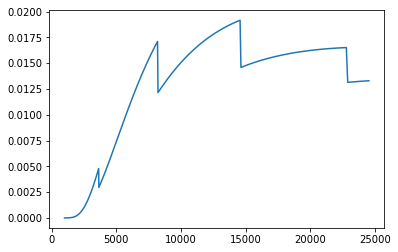

In [19]:
plt.plot(wavelength_angs,sed3_cut)
plt.show()

In [20]:
# print (wavelength)
print (np.max(wavelength_angs))
# print (wavelength)

24512.6006203


In [21]:
print (len(wavelength_angs))

695


In [22]:
sed = np.loadtxt('sed.txt')

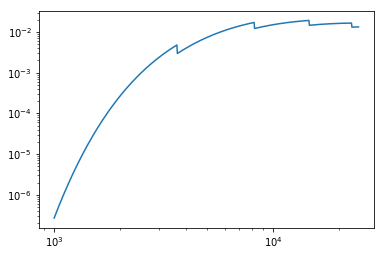

In [23]:
plt.loglog(wavelength_angs,sed3_cut,label='nebular continuum')
plt.show()

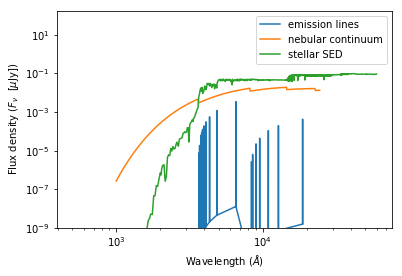

In [29]:
wave_z3 = np.loadtxt('lamb.txt')
wave5,flux5 = np.loadtxt('line_flux.txt',unpack=True,usecols=(0,1))
plt.plot(wave5,flux5,label='emission lines')
plt.loglog(wavelength_angs,sed3_cut,label='nebular continuum')
plt.loglog(wave_z3[np.where((wave_z3 >= 500) & (wave_z3 <= 60000))], 
         sed[np.where((wave_z3 >= 500) & (wave_z3 <= 60000))],label = 'stellar SED')
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylim(10e-10)
plt.ylabel(r"Flux density ($F_{\nu}$  [$\mu$Jy])")
plt.xscale('log')
plt.yscale('log')

plt.minorticks_on()
plt.legend()
plt.show()

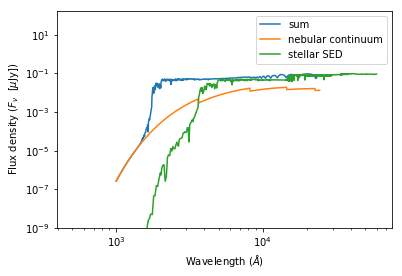

In [27]:
mask1 = np.where((wavelength_angs >= 500) & (wavelength_angs <= 24500))
resultini = sed3_cut[mask1]+sed[mask1]
#print (len(sed3_cut[mask1]))
#print (len(sed3[mask1]))

plt.loglog(wavelength_angs[mask1],resultini,label='sum')
plt.loglog(wavelength_angs,sed3_cut,label='nebular continuum')
plt.loglog(wave_z3[np.where((wave_z3 >= 500) & (wave_z3 <= 60000))], 
         sed[np.where((wave_z3 >= 500) & (wave_z3 <= 60000))],label = 'stellar SED')
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylim(10e-10)
plt.ylabel(r"Flux density ($F_{\nu}$  [$\mu$Jy])")
plt.minorticks_on()
plt.legend()
plt.show()

In [28]:
result = resultini*(10**(-29))*(3*10**18)/wavelength_angs[mask1]**2
print (result)
# np.savetxt('kindoffinalsed.txt',np.c_[wavelength[mask1],result],delimiter=" " , newline="\n")
# np.savetxt(“wave_spec.txt”, np.c_[wavecut,sedcut], delimiter=” “, newline=‘\n’)

[  8.09475367e-24   8.55589741e-24   9.04051321e-24   9.54963545e-24
   1.00843357e-23   1.06457237e-23   1.12349482e-23   1.18531981e-23
   1.25017034e-23   1.31817357e-23   1.38946100e-23   1.46416849e-23
   1.54243640e-23   1.62440968e-23   1.71023795e-23   1.80007563e-23
   1.89408198e-23   1.99242129e-23   2.09526286e-23   2.20278121e-23
   2.31515608e-23   2.43257269e-23   2.55522848e-23   2.68331331e-23
   2.81702895e-23   2.95658292e-23   3.10218854e-23   3.25406503e-23
   3.41243762e-23   3.57753757e-23   3.74960233e-23   3.92887556e-23
   4.11560724e-23   4.31005374e-23   4.51247786e-23   4.72314896e-23
   4.94234297e-23   5.17034251e-23   5.40743690e-23   5.65392222e-23
   5.91010142e-23   6.17628432e-23   6.45278767e-23   6.73993518e-23
   7.03805761e-23   7.34749273e-23   7.66858543e-23   8.00168767e-23
   8.34715857e-23   8.70536439e-23   9.07667854e-23   9.46148161e-23
   9.86016134e-23   1.02731127e-22   1.07007377e-22   1.11434455e-22
   1.16016527e-22   1.20757825e-22

<class 'list'>
